In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
def mean_std(path: str, file="distance", metric="distance"):
    distances = {}
    for i, trial in enumerate(filter(lambda x: re.match(r'^trial[0-9]+$', x), os.listdir(path))):
        data_path = os.path.join(path, trial, "run", "{}.txt".format(file))
        df = pd.read_csv(data_path)
        distances[trial] = df[metric]
    all_distance_df = pd.DataFrame(distances)
    
    return all_distance_df.mean(1), all_distance_df.std(1)

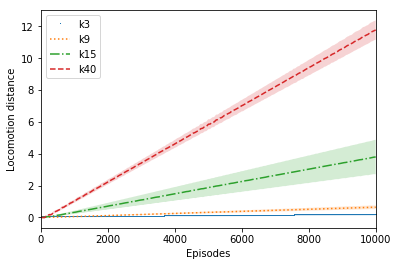

In [11]:
# average over 20 trials
# k3
y, err = mean_std("results/muscle/normal/k3/run0", "distance", "distance")
x = np.arange(len(y))
plt.plot(x, y, ',', label='k3')
plt.fill_between(x, y - err, y + err, alpha=0.2)

# k9
y, err = mean_std("results/muscle/normal/k9/run0", "distance", "distance")
x = np.arange(len(y))
plt.plot(x, y, ':', label='k9')
plt.fill_between(x, y - err, y + err, alpha=0.2)

# k15
y, err = mean_std("results/muscle/normal/k15/run0", "distance", "distance")
x = np.arange(len(y))
plt.plot(x, y, '-.', label='k15')
plt.fill_between(x, y - err, y + err, alpha=0.2)

# k40
y, err = mean_std("results/muscle/normal/k40/run0", "distance", "distance")
x = np.arange(len(y))
plt.plot(x, y, '--', label='k40')
plt.fill_between(x, y - err, y + err, alpha=0.2)

# k100
# y, err = mean_std("results/muscle/normal/k100/run0", "distance", "distance")
# x = np.arange(len(y))
# plt.plot(x, y, '-', label='k100')
# plt.fill_between(x, y - err, y + err, alpha=0.2)

plt.legend(loc='upper left')

plt.xlim([0, 10000])
# plt.ylim([-1, 9])

plt.xlabel("Episodes")
plt.ylabel("Locomotion distance")

plt.savefig("graphs/LocomotionDistance_Normal_k.png")
plt.savefig("graphs/LocomotionDistance_Normal_k.pdf")

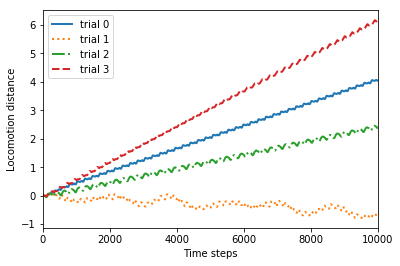

In [34]:
file_format = "results/muscle/normal/k9/run0/trial{}/run_k40/distance.txt"
linestyles = ('-', ':', '-.', '--',)
widths = (2, 2, 2, 2)

j = 0
for i in (0, 1, 2, 4,):
    df = pd.read_csv(file_format.format(i))
    plt.plot(df['step'], df['distance'], linestyles[j], label='trial {}'.format(j), lw=widths[j])
    j += 1

plt.legend(loc='upper left')
plt.xlim([0, 10000])
# plt.ylim([-1, 9])

plt.xlabel("Time steps")
plt.ylabel("Locomotion distance")

# plt.savefig("graphs/LocomotionDistance_Normal_k.png")
plt.savefig("graphs/LocomotionDistance_k9Controller_for_k40.pdf")